In [1]:
!pip install requests networkx markov_clustering pandas
import matplotlib.pyplot as plt
import requests
import networkx as nx
import markov_clustering as mc
import pandas as pd

# Example list of proteins

proteins = ['RAB25', 'BCL2L1', 'HADH', 'NFKB2', 'COX7A2', 'COX7C', 'TPMT', 'GOLPH3L', 'LTA4H', 'COX6C', 'IDH1', 'YWHAG', 'S100A10', 'COX6A1', 'NDUFB3', 'TGM2', 'CDKN1B', 'NFKB1', 'CAMK2D', 'IL4I1', 'FDX1', 'VCAM1', 'ATM', 'NCAPH2', 'ABCB8', 'IDI1', 'PLIN2', 'ATP6V1D', 'GPX4', 'CA2', 'RELA', 'GLUD1', 'TOP3B', 'RPS6KB2', 'KEAP1', 'LGALS1', 'MTDH', 'AIFM1', 'RHOA', 'CASP7', 'PTGES2', 'TFRC', 'CHUK', 'GPX1', 'PDK1', 'STAT3', 'PECR', 'TALDO1', 'XIAP', 'ACADSB', 'CPOX', 'ARNT', 'BIRC2', 'ACOT7', 'HACL1', 'MYD88', 'EGFR', 'RIPK1', 'NBN', 'LDHA']

# gloabal_prot = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/FFPE_discovery_globalprotein_imputed.tsv",delimiter='\t')
# HGSOC_prots = gloabal_prot["HGNC symbol"].to_list()

# tcga_proteomic = pd.read_excel("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_Zhang_TCGA_CPTAC_OV/mmc3-2.xlsx")
# tcga_prots = tcga_proteomic["hgnc_symbol"].to_list()

# # https://www.nature.com/articles/s41388-021-02055-2#additional-information
# plat_resistance_df = pd.read_excel("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/plat_res_prots.xlsx",header=2)
# plat_res_prots = plat_resistance_df["HUGO Gene symbol"].to_list() # need the ones in both train and test... 

# set1 = set(tcga_prots)
# set2 = set(HGSOC_prots)
# set3 = set(plat_res_prots)
# # Find intersection
# intersection = set1 & set2 & set3

# # Convert back to list
# proteins = list(intersection)

print(len(proteins))
# get all intersecting prots.

60


In [2]:
# plat_resistance_df["Function"].value_counts()

NameError: name 'plat_resistance_df' is not defined

In [3]:
# Convert list of proteins to STRING format
protein_str = "%0d".join(proteins)

# STRING API URL for interaction network
api_url = "https://string-db.org/api/tsv/network"

# Parameters for the API request
params = {
    "identifiers": protein_str,
    "species": 9606,  # Human
    "network_type": "functional",
}

# Make the API request
# TODO : make plot of gene adjaceny matrix for figure.

response = requests.post(api_url, data=params)

# Parse the response to create a graph
G = nx.Graph()
for line in response.text.split('\n')[1:]:  # Skip the header line
    try:
        parts = line.split("\t")
        # Extract the protein names and interaction score
        protein1, protein2, score = parts[2], parts[3], parts[12]
        G.add_edge(protein1, protein2, score=score)

    except:
        pass
# Check if the graph is created successfully
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 192
Average degree:   7.5294


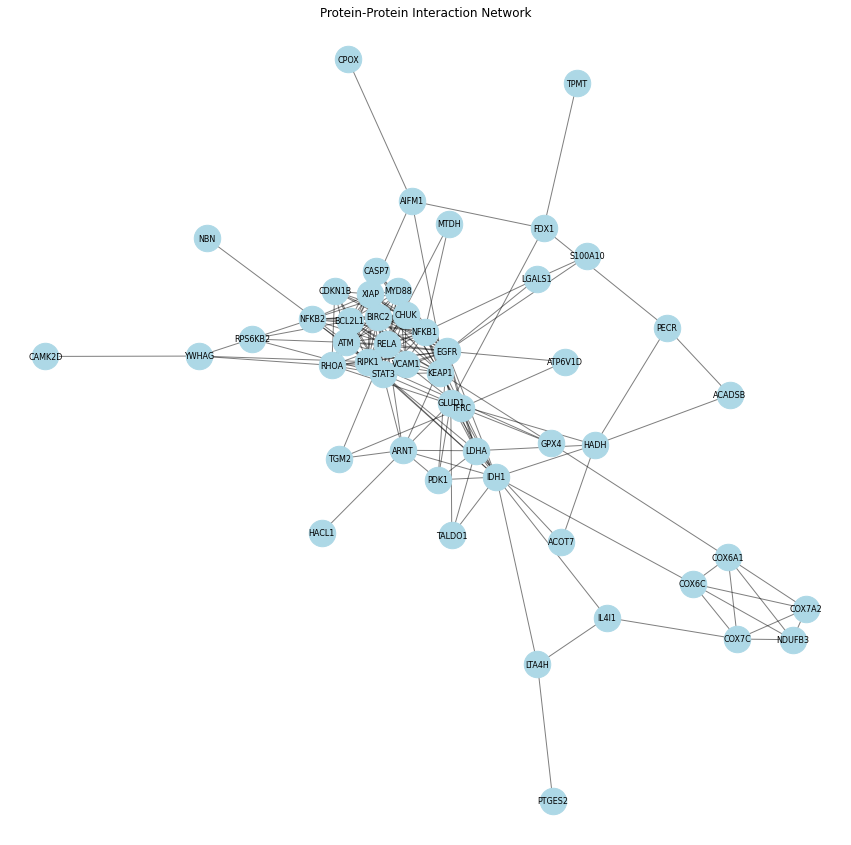

In [4]:

# Set figure size and background color
plt.figure(figsize=(15, 15), facecolor='white')

# Draw the graph
pos = nx.spring_layout(G, k=0.1)  # Adjust layout as needed
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw labels with smaller font size
nx.draw_networkx_labels(G, pos, font_size=8)  # Reduce font size here

plt.title("Protein-Protein Interaction Network", fontsize=12)
plt.axis('off')
plt.show()

In [5]:
# Perform Markov Cluster Algorithm
matrix = nx.to_scipy_sparse_matrix(G)
# result = mc.run_mcl(matrix)  # Run MCL with default parameters
# clusters = mc.get_clusters(result)  # Get clusters



# Experiment with different inflation values
inflation_values = [1.5, 2, 2.5, 3, 3.5, 4]  # Adjust these values as needed

for inflation in inflation_values:
    result = mc.run_mcl(matrix, inflation=inflation)  # Run MCL with the specified inflation parameter
    clusters = mc.get_clusters(result)  # Get clusters
    num_clusters = len(clusters)
    print(f"Inflation: {inflation}, Number of clusters: {num_clusters}")


# Create a mapping of node index to protein name
index_protein_map = {index: protein for index, protein in enumerate(G.nodes())}

# Mapping each protein to its cluster
cluster_map = {}
for cluster_id, cluster in enumerate(clusters):
    for node_index in cluster:
        protein_name = index_protein_map[node_index]
        cluster_map[protein_name] = cluster_id

# Create a DataFrame for cluster membership
df = pd.DataFrame(list(cluster_map.items()), columns=['Protein', 'Cluster'])

print(df)

Inflation: 1.5, Number of clusters: 3
Inflation: 2, Number of clusters: 9
Inflation: 2.5, Number of clusters: 10
Inflation: 3, Number of clusters: 11
Inflation: 3.5, Number of clusters: 13
Inflation: 4, Number of clusters: 15
    Protein  Cluster
0    LGALS1        0
1     NFKB1        0
2      EGFR        0
3   S100A10        0
4   ATP6V1D        0
5    CDKN1B        0
6      MTDH        0
7     CASP7        0
8      XIAP        0
9    BCL2L1        0
10    KEAP1        0
11     RHOA        0
12    VCAM1        0
13    BIRC2        0
14    RIPK1        0
15    STAT3        0
16    MYD88        0
17     CHUK        0
18    NFKB2        0
19     TFRC        1
20     LDHA        2
21     IDH1        3
22    IL4I1        3
23     PDK1        3
24   TALDO1        3
25      ATM        4
26  RPS6KB2        4
27      NBN        4
28     RELA        5
29     TGM2        5
30    LTA4H        6
31   PTGES2        6
32   COX6A1        7
33   NDUFB3        7
34   COX7A2        7
35    COX6C       

In [6]:
df["Cluster"].value_counts().values

array([19,  5,  4,  4,  3,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1])

In [7]:
import gseapy as gp

# see how this matches the given clustering...


# Grouping the DataFrame by 'Cluster' and creating a dictionary of protein lists
clustered_proteins = df.groupby('Cluster')['Protein'].apply(list).to_dict()

# Initialize an empty DataFrame to store the top 5 pathways for each cluster
top_pathways_df = pd.DataFrame(columns=['Cluster', 'Top_Pathways'])

# Perform enrichment analysis for each cluster
for cluster_id, proteins in clustered_proteins.items():
    # Run the analysis using the GO Biological Process database
    enr = gp.enrichr(gene_list=proteins,
                     gene_sets='GO_Biological_Process_2021',
                     organism='Human',  # specify your organism
                     outdir=None,  # Set to None to not save to file
                     cutoff=0.05)  # p-value cutoff

    # Convert the results to a DataFrame
    df_results = pd.DataFrame(enr.results)

    # Select the top 5 pathways based on Adjusted P-value
    top_pathways = df_results.nsmallest(1, 'Adjusted P-value')['Term'].tolist()

    # Append to the top_pathways_df DataFrame
    top_pathways_df = top_pathways_df.append({'Cluster': cluster_id, 'Top_Pathways': top_pathways}, ignore_index=True)

print(top_pathways_df)

   Cluster                                       Top_Pathways
0        0  [positive regulation of NF-kappaB transcriptio...
1        1  [negative regulation of mitochondrial fusion (...
2        2                  [glycolytic process (GO:0006096)]
3        3        [isocitrate metabolic process (GO:0006102)]
4        4  [negative regulation of telomere capping (GO:1...
5        5  [cellular response to oxygen-containing compou...
6        6            [neutrophil degranulation (GO:0043312)]
7        7    [aerobic electron transport chain (GO:0019646)]
8        8                [lipoxygenase pathway (GO:0019372)]
9        9    [regulation of cell communication (GO:0010646)]
10      10  [C21-steroid hormone biosynthetic process (GO:...
11      11                [fatty acid oxidation (GO:0019395)]
12      12           [heme biosynthetic process (GO:0006783)]
13      13         [glutamate catabolic process (GO:0006538)]
14      14  [regulation of hormone biosynthetic process (G...


In [8]:
top_pathways_df.head(10)
top_pathways_df.to_csv("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/60_shared_proteins_PPI_clusters_pathway_names.csv",index=None)

In [ ]:
# save in one established format to load in pipeline.... 
df.to_csv("/mnt/ncshare/ozkilim/BRCA/data/HGSOC_processed_data/60_shared_proteins_PPI_clusters.csv",index=None)